In [43]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [44]:
# random seed for reproducible results
np.random.seed(123)

In [45]:
my_data = np.genfromtxt('wine_data.csv', delimiter=',')
n_train = 100

np.random.shuffle(my_data)  # shuffle datataset
trainingData = my_data[:n_train, 1:]  # training data
trainingLabels = my_data[:n_train, 0]  # class labels of training data

testData = my_data[n_train:, 1:]  # training data
testLabels = my_data[n_train:, 0]  # class labels of training data

In [46]:
def my_LDA(X, Y):
    """
    Train a LDA classifier from the training set
    X: training data
    Y: class labels of training data

    """    
    classLabels = np.unique(Y)  # different class labels on the dataset
    print(classLabels)
    classNum = len(classLabels)
    datanum, dim = X.shape  # dimensions of the dataset
    totalMean = np.mean(X, 0)  # total mean of the data

    # ====================== YOUR CODE HERE ======================
    # Instructions: Implement the LDA technique, following the
    # steps given in the pseudocode on the assignment.
    # The function should return the projection matrix W,
    # the centroid vector for each class projected to the new
    # space defined by W and the projected data X_lda.
    
    #computing within class scatter matrix
    
    scatter_within_matrix = np.zeros((dim,dim))
    list_mean_centroids = []
    list_nj = []
    for k in classLabels:
        scatter_within_matrix += np.cov(X[np.where(Y == k)], 
                                        rowvar = False)
        list_mean_centroids.append(np.mean(X[np.where(Y == k)], axis = 0))
        list_nj.append(sum(Y == k))
        
    print(list_mean_centroids[0].shape)
    
        
    
    scatter_between_matrix = np.cov(X, rowvar = False) - scatter_within_matrix
    inverse_scatter_within =  np.linalg.inv(scatter_within_matrix)
    results = linalg.eig(np.matmul(inverse_scatter_within,
                                   scatter_between_matrix))
    
    index = np.argsort(np.abs(results[0]))[-classNum+1:]
    W = results[1].T[index].T
    
    X_lda = np.dot(X, W)
    
    projected_centroid = np.dot(list_mean_centroids, W)
    

    # =============================================================

    return W, projected_centroid, X_lda

In [47]:
# training LDA classifier
W, projected_centroid, X_lda = my_LDA(trainingData, trainingLabels)

[1. 2. 3.]
(13,)


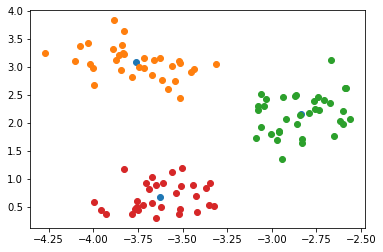

In [48]:
plt.scatter(projected_centroid[:,0], 
            projected_centroid[:,1])
plt.scatter(X_lda[np.where(trainingLabels == 1)][:,0],
            X_lda[np.where(trainingLabels == 1)][:,1])
plt.scatter(X_lda[np.where(trainingLabels == 2)][:,0],
            X_lda[np.where(trainingLabels == 2)][:,1])
plt.scatter(X_lda[np.where(trainingLabels == 3)][:,0],
            X_lda[np.where(trainingLabels == 3)][:,1])

In [49]:
def predict(X, projected_centroid, W):
    """Apply the trained LDA classifier on the test data
    X: test data
    projected_centroid: centroid vectors of each class projected to the new space
    W: projection matrix computed by LDA
    """

    # Project test data onto the LDA space defined by W
    projected_data = np.dot(X, W)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in the code to implement the classification
    # part of LDA. Follow the steps given in the assigment.
    
    #print(projected_data)
    label = []
    for element in projected_data:
        min_distance = np.inf
        min_index = np.nan
        for i, centroid in enumerate(projected_centroid):
            current_dist = np.linalg.norm(element - centroid)
            if current_dist < min_distance:
                min_distance = current_dist
                min_index = i
        
        label.append(min_index+1)
    

    # =============================================================

    # Return the predicted labels of the test data X
    return np.array(label)

In [50]:
# Perform predictions for the test data
predictedLabels = predict(testData, projected_centroid, W)
# predictedLabels = predictedLabels+1


# Compute accuracy
counter = 0
for i in range(predictedLabels.size):
    if predictedLabels[i] == testLabels[i]:
        counter += 1
print('Accuracy of LDA: %f' % (counter / float(predictedLabels.size) * 100.0))

Accuracy of LDA: 97.435897
